In [9]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gzip

%matplotlib inline

# pd.set_option('display.precision', 20)

In [10]:
finance_data_5 = pd.read_csv('Data/NASDAQ_20101201_5.txt')
# finance_data_5['timestamp'] = finance_data_5['<date>']%10000
# finance_data_5['hours'] = finance_data_5['timestamp']/100
# finance_data_5['hours'] = finance_data_5.astype({'hours': 'int64'}).hours
# finance_data_5['timestamp'] = finance_data_5['timestamp']%100 + finance_data_5.hours * 60

finance_data_5.describe()

<date>         <open>         <high>          <low>  \
count  1.180480e+05  118048.000000  118048.000000  118048.000000   
mean   2.010120e+11      21.662302      21.685160      21.638585   
std    2.036166e+02      31.670875      31.699195      31.644321   
min    2.010120e+11       0.100000       0.100000       0.100000   
25%    2.010120e+11       6.310000       6.324375       6.300000   
50%    2.010120e+11      14.210000      14.220000      14.190000   
75%    2.010120e+11      28.030000      28.060000      28.000000   
max    2.010120e+11    1075.000000    1075.000000    1075.000000   

             <close>         <vol>  
count  118048.000000  1.180480e+05  
mean       21.662212  1.411107e+04  
std        31.671607  7.133155e+04  
min         0.100000  3.500000e+01  
25%         6.310000  5.000000e+02  
50%        14.200000  1.800000e+03  
75%        28.030000  6.913000e+03  
max      1075.000000  5.288632e+06

In [3]:
finance_data_5.head()

<ticker> <per>        <date>  <open>  <high>  <low>  <close>  <vol>
0     AAME     I  201012010930    1.87    1.87   1.87     1.87    100
1     AAME     I  201012010940    1.95    1.95   1.93     1.93    300
2     AAME     I  201012010955    1.95    1.95   1.93     1.93    300
3     AAME     I  201012011205    1.92    1.93   1.92     1.93   1800
4     AAME     I  201012011220    1.92    1.93   1.92     1.93   1800

In [4]:
finance_data_5.astype('object').describe()


<ticker>   <per>        <date>     <open>     <high>      <low>  \
count    118048  118048        118048  118048.00  118048.00  118048.00   
unique     1909       1            96   18529.00   17047.00   17033.00   
top        NFLX       I  201012011555       1.39       1.39       1.38   
freq         96  118048          1669     216.00     345.00     295.00   

          <close>   <vol>  
count   118048.00  118048  
unique   18846.00   25958  
top          1.39     100  
freq       203.00   10272

[  3 165   0 ...   0   0   2] [1.00000000e-01 1.71660000e-01 2.43320000e-01 ... 1.07485668e+03
 1.07492834e+03 1.07500000e+03]
1745


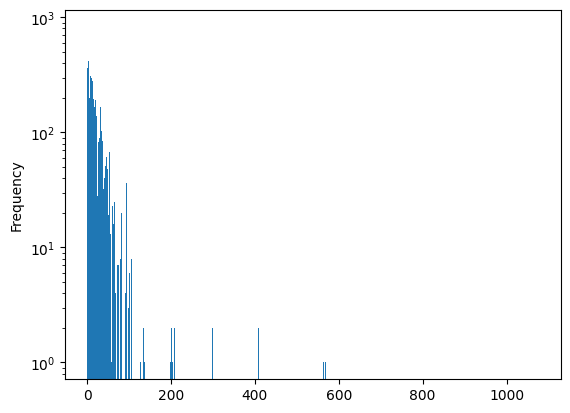

In [11]:
num_of_bins = 15000
ax = finance_data_5['<close>'].plot.hist(bins=num_of_bins)
ax.set_yscale('log')
count, division = np.histogram(finance_data_5['<close>'], bins=num_of_bins)
print(count, division)
count_wo_zeros = [el for el in count if el !=0]
print(len(count_wo_zeros))

In [14]:
for i in [5000, 10000, 15000]:
    finance_data_5[f'close_{i}'] = pd.qcut(finance_data_5['<close>'], q=i, duplicates='drop')

# finance_data_5['close_int'] = pd.to_numeric(finance_data_5['<close>'], downcast="integer")

In [15]:
for i in [5000, 10000, 15000]:
    print(finance_data_5[f'close_{i}'].value_counts())

(1.388813, 1.39]      221
(1.375, 1.38]         175
(3.897612, 3.9]       154
(5.48, 5.49]          135
(3.49, 3.5]           133
                     ... 
(27.8, 27.804451]       0
(8.5, 8.500913]         0
(16.14, 16.140182]      0
(7.85, 7.850001]        0
(31.8, 31.805624]       0
Name: close_5000, Length: 4045, dtype: int64
(1.3899, 1.39]        203
(1.375, 1.38]         175
(3.897612, 3.9]       154
(1.428927, 1.43]      130
(5.485, 5.49]         127
                     ... 
(44.74, 44.741456]      0
(7.85, 7.850001]        0
(7.83, 7.833826]        0
(21.57, 21.57198]       0
(8.47, 8.471044]        0
Name: close_10000, Length: 6083, dtype: int64
(1.3899, 1.39]         203
(1.3799905, 1.38]      170
(3.8976123, 3.9]       154
(1.428927, 1.43]       130
(5.4897926, 5.49]      125
                      ... 
(14.39, 14.3900948]      0
(14.35, 14.352554]       0
(41.23, 41.233438]       0
(14.17, 14.1703624]      0
(10.45, 10.4560118]      0
Name: close_15000, Length: 7643, dtype: 

In [16]:
ax = finance_data_5['close_5000'].value_counts().plot(kind='bar')
#ax.set_yscale('log')


<AxesSubplot: xlabel='close_3', ylabel='Count'>

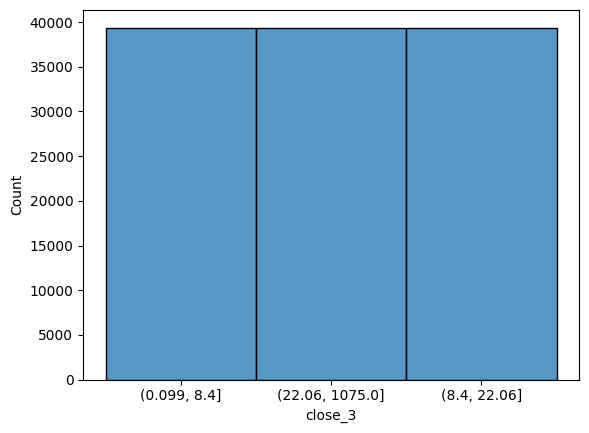

In [18]:
# mids = []
# for idx in finance_data_5.index:
#     mids.append(finance_data_5.loc[idx, 'close_3'].mid)
# finance_data_5['mid'] = mids
#finance_data_5.close_3 = finance_data_5.close_3.astype(str)
sns.histplot(data = finance_data_5, x ='close_3')

[117700    245     63     24      3     11      1      0      0      1] [3.5000000e+01 5.2889470e+05 1.0577544e+06 1.5866141e+06 2.1154738e+06
 2.6443335e+06 3.1731932e+06 3.7020529e+06 4.2309126e+06 4.7597723e+06
 5.2886320e+06]


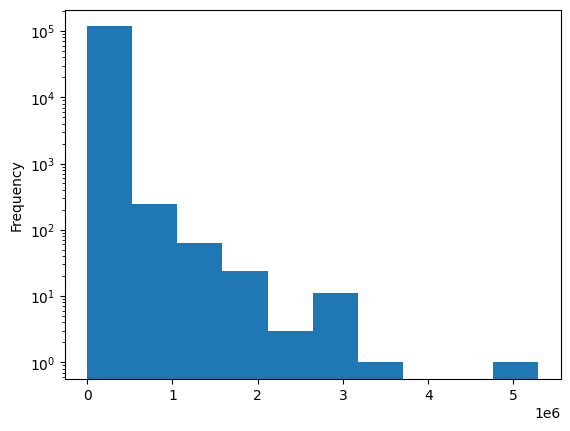

In [14]:
ax = finance_data_5['<vol>'].plot.hist()
ax.set_yscale('log')
# ax.set_xscale('log')
count, division = np.histogram(finance_data_5['<vol>'])
print(count, division)

In [40]:
for i in range(2,20):
    finance_data_5[f'vol_{i}'] = pd.qcut(finance_data_5['<vol>'], q=i)

#finance_data_5['vol_int'] = finance_data_5['<vol>'].astype(int)

In [35]:
finance_data_5.head()

<ticker> <per>        <date>  <open>  <high>  <low>  <close>  <vol>  \
0     AAME     I  201012010930    1.87    1.87   1.87     1.87    100   
1     AAME     I  201012010940    1.95    1.95   1.93     1.93    300   
2     AAME     I  201012010955    1.95    1.95   1.93     1.93    300   
3     AAME     I  201012011205    1.92    1.93   1.92     1.93   1800   
4     AAME     I  201012011220    1.92    1.93   1.92     1.93   1800   

         close_2       close_3  ...            vol_10            vol_11  \
0  (0.099, 14.2]  (0.099, 8.4]  ...   (34.999, 200.0]   (34.999, 135.0]   
1  (0.099, 14.2]  (0.099, 8.4]  ...    (200.0, 316.4]    (135.0, 300.0]   
2  (0.099, 14.2]  (0.099, 8.4]  ...    (200.0, 316.4]    (135.0, 300.0]   
3  (0.099, 14.2]  (0.099, 8.4]  ...  (1100.0, 1800.0]  (1411.0, 2260.0]   
4  (0.099, 14.2]  (0.099, 8.4]  ...  (1100.0, 1800.0]  (1411.0, 2260.0]   

             vol_12            vol_13              vol_14            vol_15  \
0   (34.999, 100.0]   (34.999, 100.0]     (34.999, 100.0]   (34.999, 100.0]   
1    (100.0, 300.0]    (235.0, 400.0]      (200.0, 400.0]    (200.0, 316.4]   
2    (100.0, 300.0]    (235.0, 400.0]      (200.0, 400.0]    (200.0, 316.4]   
3  (1200.0, 1800.0]  (1500.0, 2200.0]  (1253.571, 1800.0]  (1500.0, 2100.0]   
4  (1200.0, 1800.0]  (1500.0, 2200.0]  (1253.571, 1800.0]  (1500.0, 2100.0]   

             vol_16            vol_17            vol_18            vol_19  
0   (34.999, 100.0]   (34.999, 100.0]   (34.999, 100.0]   (34.999, 100.0]  
1    (200.0, 300.0]    (200.0, 300.0]    (200.0, 300.0]    (275.0, 400.0]  
2    (200.0, 300.0]    (200.0, 300.0]    (200.0, 300.0]    (275.0, 400.0]  
3  (1300.0, 1800.0]  (1580.0, 2100.0]  (1388.0, 1800.0]  (1600.0, 2053.0]  
4  (1300.0, 1800.0]  (1580.0, 2100.0]  (1388.0, 1800.0]  (1600.0, 2053.0]  

[5 rows x 44 columns]

In [36]:
finance_data_5.describe(include='category')

close_2       close_3        close_4        close_5  \
count          118048        118048         118048         118048   
unique              2             3              4              5   
top     (0.099, 14.2]  (0.099, 8.4]  (14.2, 28.03]  (0.099, 5.08]   
freq            59027         39384          29525          23643   

             close_6        close_7        close_8        close_9  \
count         118048         118048         118048         118048   
unique             6              7              8              9   
top     (0.099, 4.2]  (0.099, 3.81]  (0.099, 3.43]  (0.099, 3.08]   
freq           19726          16892          14779          13141   

            close_10      close_11  ...           vol_10          vol_11  \
count         118048        118048  ...           118048          118048   
unique            10            11  ...               10              11   
top     (2.79, 5.08]  (6.92, 9.42]  ...  (34.999, 200.0]  (135.0, 300.0]   
freq           11828         10760  ...            17791           12720   

                vol_12          vol_13           vol_14           vol_15  \
count           118048          118048           118048           118048   
unique              12              13               14               15   
top     (100.0, 300.0]  (400.0, 700.0]  (34.999, 100.0]  (34.999, 100.0]   
freq             13186           10522            10276            10276   

                 vol_16           vol_17           vol_18           vol_19  
count            118048           118048           118048           118048  
unique               16               17               18               19  
top     (34.999, 100.0]  (34.999, 100.0]  (34.999, 100.0]  (34.999, 100.0]  
freq              10276            10276            10276            10276  

[4 rows x 36 columns]

In [16]:
for i in range(2,20):
    print(finance_data_5[f'vol_{i}'].value_counts())

(34.999, 1800.0]       59349
(1800.0, 5288632.0]    58699
Name: vol_2, dtype: int64
(34.999, 800.0]        41084
(4299.0, 5288632.0]    39348
(800.0, 4299.0]        37616
Name: vol_3, dtype: int64
(34.999, 500.0]        32189
(6913.0, 5288632.0]    29511
(1800.0, 6913.0]       29188
(500.0, 1800.0]        27160
Name: vol_4, dtype: int64
(316.4, 1100.0]        24693
(34.999, 316.4]        23610
(9764.2, 5288632.0]    23610
(3000.0, 9764.2]       23317
(1100.0, 3000.0]       22818
Name: vol_5, dtype: int64
(34.999, 300.0]         23462
(12579.5, 5288632.0]    19675
(4299.0, 12579.5]       19673
(1800.0, 4299.0]        19351
(800.0, 1800.0]         18265
(300.0, 800.0]          17622
Name: vol_6, dtype: int64
(34.999, 200.0]         17791
(200.0, 600.0]          17746
(1253.571, 2600.0]      17311
(15500.0, 5288632.0]    16855
(5600.0, 15500.0]       16759
(2600.0, 5600.0]        16531
(600.0, 1253.571]       15055
Name: vol_7, dtype: int64
(34.999, 200.0]           17791
(18421.125, 5288

# Pattern 3
Pattern
SEQ(Stock a, Stock b, Stock c, Stock d)

Where a.vol=b.vol And a.vol=c.vol

And a.vol=d.vol

Within 50 seconds

In [71]:
counter=0
for vol in finance_data_5['<vol>'].unique():
    df = finance_data_5.loc[finance_data_5['<vol>'] == vol]
    df2 = df.sort_values(by='timestamp', ignore_index=True)
    if df2.shape[0] >=4:
        for idx in df2.index:
            if idx +3 < df2.shape[0]:
                if df2.timestamp[idx+3] - df2.timestamp[idx] == 0:
                    print(vol, df2.timestamp[idx+3])
                    counter+=1

        
print(counter)

100 540
100 540
100 540
100 540
100 540
100 540
100 540
100 540
100 540
100 540
100 540
100 540
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 545
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 550
100 555
100 555
100 555
100 555
100 555
100 555
100 555
100 555
100 555
100 555
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 560
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565
100 565


In [2]:
finance_data_60 = pd.read_csv('Data/NASDAQ_20101201_60.txt')
finance_data_60.tail(25)

<ticker> <per>        <date>   <open>   <high>    <low>  <close>   <vol>
13916     ZIXI     I  201012011600   3.7100   3.7100   3.7000   3.7000   23394
13917       ZN     I  201012010900   4.9500   4.9500   4.8400   4.8899    6583
13918       ZN     I  201012011000   4.8600   4.8600   4.7801   4.7980   10599
13919       ZN     I  201012011100   4.8299   4.8800   4.8100   4.8800    3875
13920       ZN     I  201012011200   4.8800   4.9200   4.8400   4.8800   10653
13921       ZN     I  201012011300   4.8800   4.9400   4.8800   4.9399    4326
13922       ZN     I  201012011400   4.9107   4.9400   4.8900   4.8900   12349
13923       ZN     I  201012011500   4.9100   4.9400   4.8700   4.8700   18167
13924       ZN     I  201012011600   4.9000   4.9100   4.8600   4.8600   14720
13925     ZOOM     I  201012010900   3.5000   3.5001   3.4500   3.4900   12854
13926     ZOOM     I  201012011000   3.5000   3.5600   3.4800   3.4900   38043
13927     ZOOM     I  201012011100   3.5000   3.5000   3.4801   3.4820    4100
13928     ZOOM     I  201012011200   3.4800   3.4801   3.4500   3.4600    6500
13929     ZOOM     I  201012011300   3.4700   3.4700   3.4100   3.4500   21540
13930     ZOOM     I  201012011400   3.4501   3.4600   3.4200   3.4600    5548
13931     ZOOM     I  201012011500   3.4600   3.4600   3.4500   3.4500   10245
13932     ZOOM     I  201012011600   3.4600   3.4600   3.4500   3.4500    1545
13933     ZUMZ     I  201012010900  32.2300  33.1290  32.0200  32.2304   71499
13934     ZUMZ     I  201012011000  32.1600  32.1600  31.2200  31.6700  144923
13935     ZUMZ     I  201012011100  31.7200  31.9100  31.4100  31.5000  115087
13936     ZUMZ     I  201012011200  31.5199  31.6200  31.1000  31.1600  129431
13937     ZUMZ     I  201012011300  31.2000  31.4700  31.2000  31.3700  192430
13938     ZUMZ     I  201012011400  31.3400  31.3700  31.2300  31.3400  109825
13939     ZUMZ     I  201012011500  31.3500  31.9300  31.3500  31.5700  268051
13940     ZUMZ     I  201012011600  31.5700  31.7500  30.5000  31.5900   22609